In [2]:

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
diamonds=pd.read_csv('D:\diamonds.csv')
diamonds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


there are 3 object type of data also there is no missing data as shown in the null count section 

In [3]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# Checking for missing values per column
diamonds.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [7]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


when we look at  the minimum values we notice some zeros in the x, y,z columns so that means there is missing data in x y z columns

In [4]:
diamonds['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [5]:
diamonds['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [6]:
diamonds['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

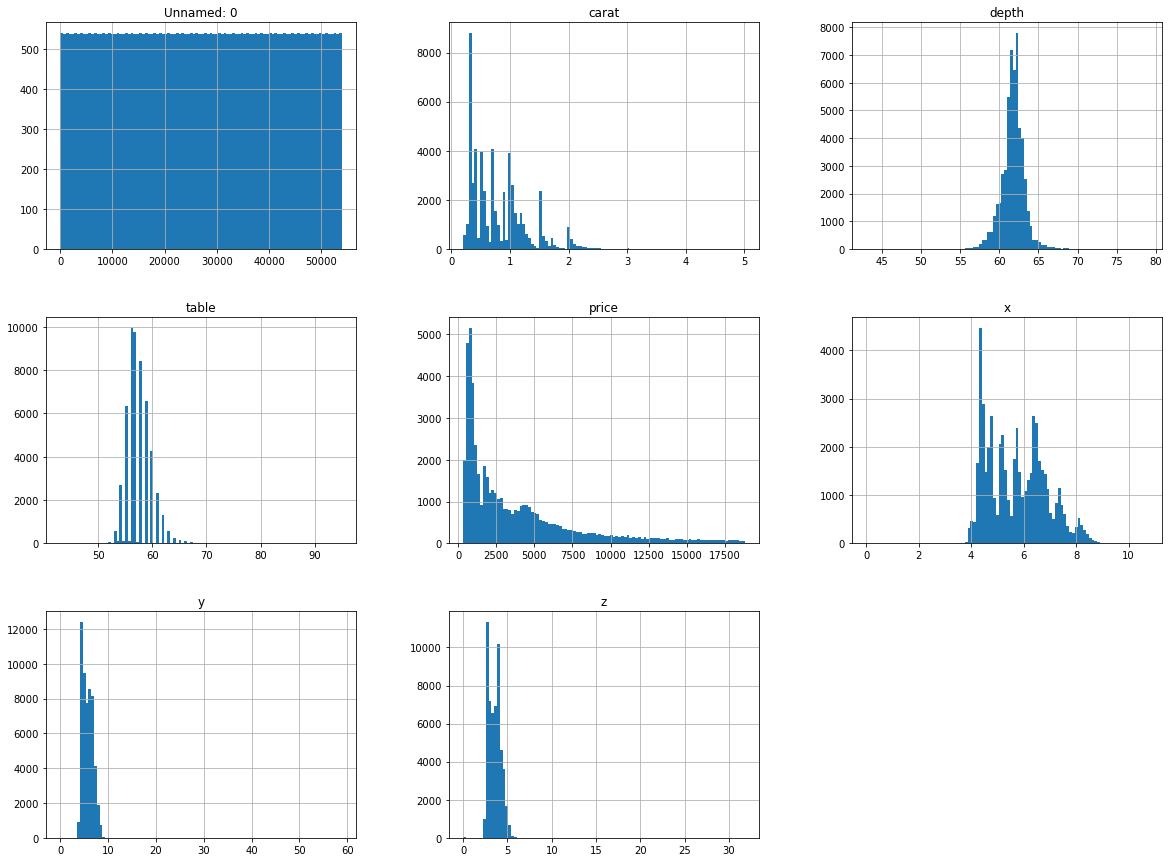

In [10]:
diamonds.hist(bins=100,figsize=(20,15))
plt.show()

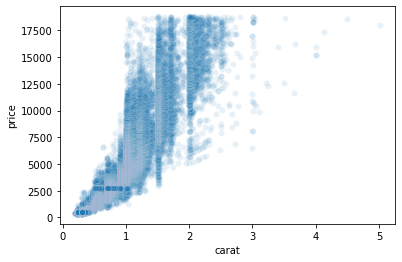

In [2]:
sns.scatterplot(data=diamonds, x='carat', y='price', alpha=0.1)
plt.show()

It is obvious that the price get higher as the carat icreases.

In [5]:
corr_mat=diamonds.corr()

In [6]:
corr_mat['price'].sort_values(ascending=False)

price         1.000000
carat         0.921591
x             0.884435
y             0.865421
z             0.861249
table         0.127134
depth        -0.010647
Unnamed: 0   -0.306873
Name: price, dtype: float64

there is a strong correlation betwen rhe wight(carat) and the volume (x,y,z) with the price and 
 It is recognizable here that depth and table have very weak correlation with price.

<AxesSubplot:>

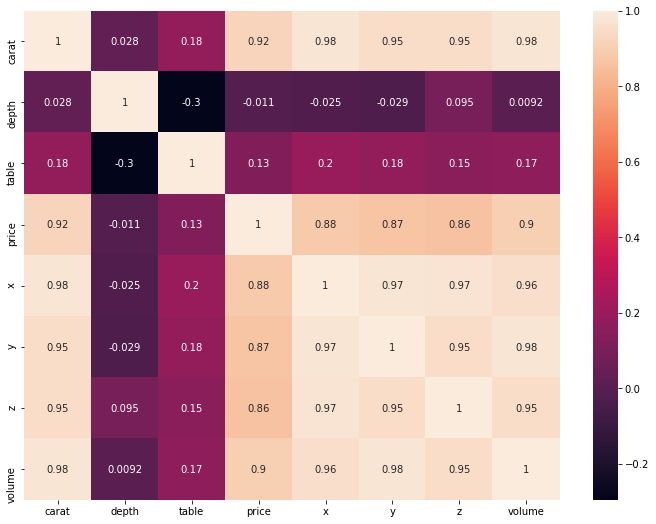

In [15]:
fig, ax = plt.subplots(figsize=(12,9))     
sns.heatmap(diamonds.corr(), annot=True, ax=ax)

<function matplotlib.pyplot.show(close=None, block=None)>

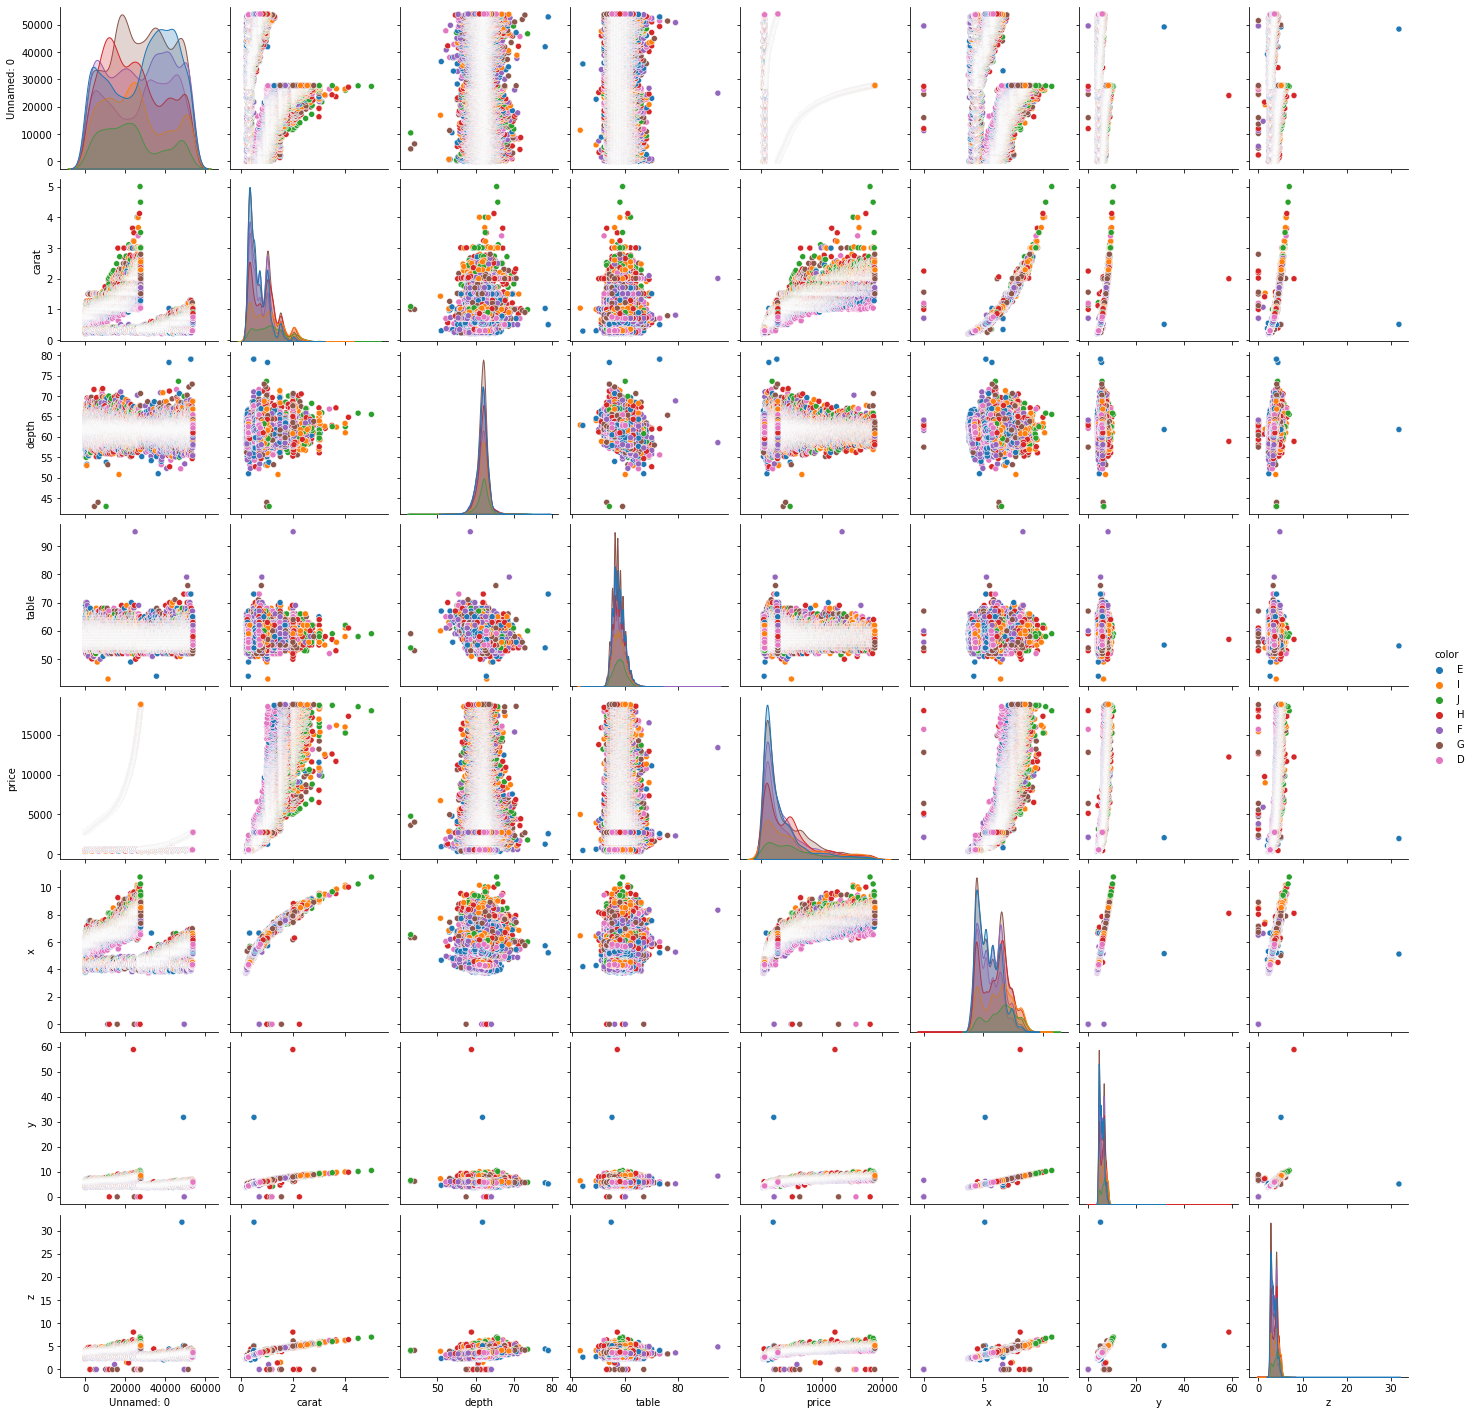

In [10]:
sns.pairplot(data=diamonds,hue='color')
plt.show

there is an unexposed correlation between depth and table with the price if you look closely you might notice that all the highest price diamonds are between a certain range 

so lets zoom the coorelation 

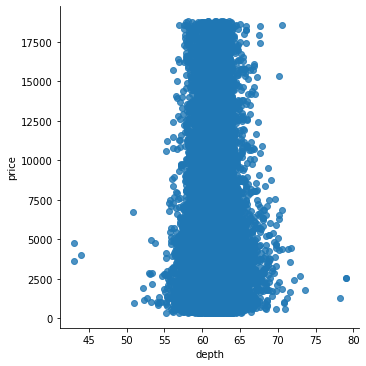

In [95]:
sns.lmplot(data=diamonds,x='depth',y='price',fit_reg=False)

according to experts the depth is deemed acceptable within a certain range, with any value between 56.5 and 65 percent considered good.
However, the ideal depth is between 59.5 and 62.9 percent according to experts..  and as showed in the plot the hightist price diamonds is between 60 and64

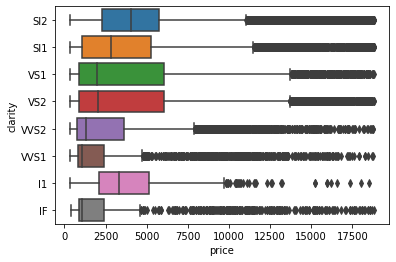

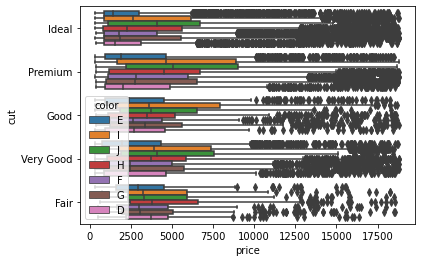

In [6]:
sns.boxplot(x=diamonds['price'],y=diamonds['clarity'])
plt.show()
sns.boxplot(x=diamonds['price'],y=diamonds['cut'],hue=diamonds['color'])
plt.show()

when ploting the categorical data with the price it is hard to notice the effect so we plot the carat and price based on  the categorical  feature

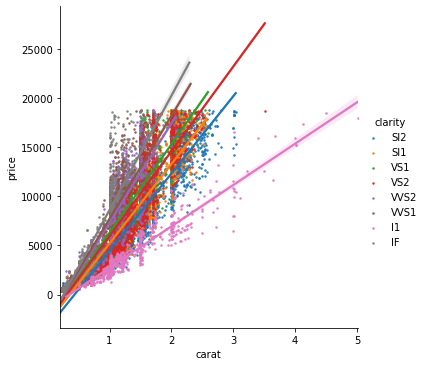

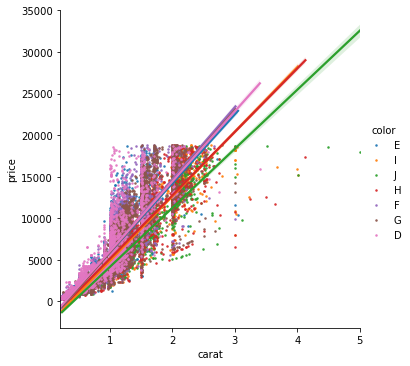

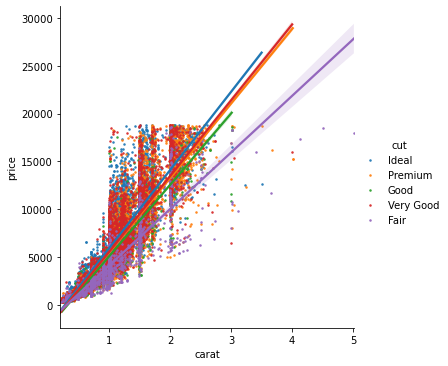

In [10]:
sns.lmplot(data=diamonds,x='carat',y='price',hue='clarity',markers='.',scatter_kws={"s":10})
plt.show()
sns.lmplot(data=diamonds,x='carat',y='price',hue='color',markers='.',scatter_kws={"s": 10})
plt.show()
sns.lmplot(data=diamonds,x='carat',y='price',hue='cut',markers='.',scatter_kws={"s": 10})
plt.show()

that's better

now lets take a look on the missing  data

In [25]:
sum(diamonds['x']==0)

8

In [17]:
sum(diamonds['y']==0)

7

In [18]:
sum(diamonds['z']==0)

20

In [24]:
diamonds[diamonds['z']==0]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
2207,2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


as can be seen when the z=0 the y and x equal 0 too so all the missing data is 20

Unnamed: 0       AxesSubplot(0.125,0.125;0.0824468x0.755)
carat         AxesSubplot(0.223936,0.125;0.0824468x0.755)
depth         AxesSubplot(0.322872,0.125;0.0824468x0.755)
table         AxesSubplot(0.421809,0.125;0.0824468x0.755)
price         AxesSubplot(0.520745,0.125;0.0824468x0.755)
x             AxesSubplot(0.619681,0.125;0.0824468x0.755)
y             AxesSubplot(0.718617,0.125;0.0824468x0.755)
z             AxesSubplot(0.817553,0.125;0.0824468x0.755)
dtype: object

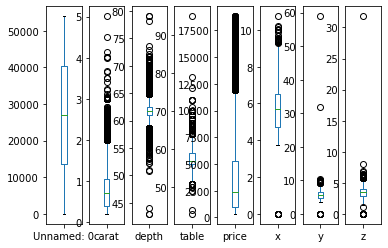

In [3]:
diamonds.plot(kind='box',subplots=True,)

most of the data are in the small carat and the lower price

<AxesSubplot:>

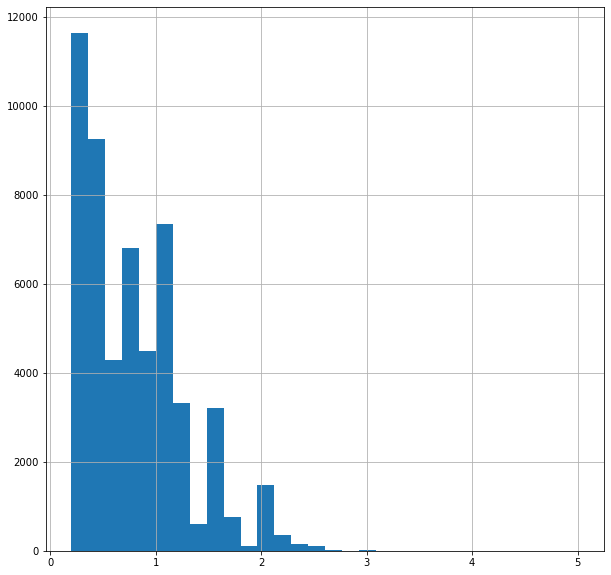

In [3]:
diamonds['carat'].hist(bins=30, figsize=(10,10))

It can be noticed that most of the diamonds are (0.2-1.6) carats

now lets start by reducing the data attribute

In [3]:
diamonds['volume']=diamonds['x']*diamonds['y']*diamonds['z']

this not the real formula for the diamond volume but it will work

In [6]:
diamonds.corr()

,Unnamed: 0,carat,depth,table,price,x,y,z,volume
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208,-0.367016
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,0.976308
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,0.009157
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,0.167400
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,0.902385
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,0.956564
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,0.975143
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,0.950065
volume,-0.367016,0.976308,0.009157,0.167400,0.902385,0.956564,0.975143,0.950065,1.000000


the correlation between the volume and the price is higher than it with the x,y,z 

### ploting the carat and price based on the features catagorical  

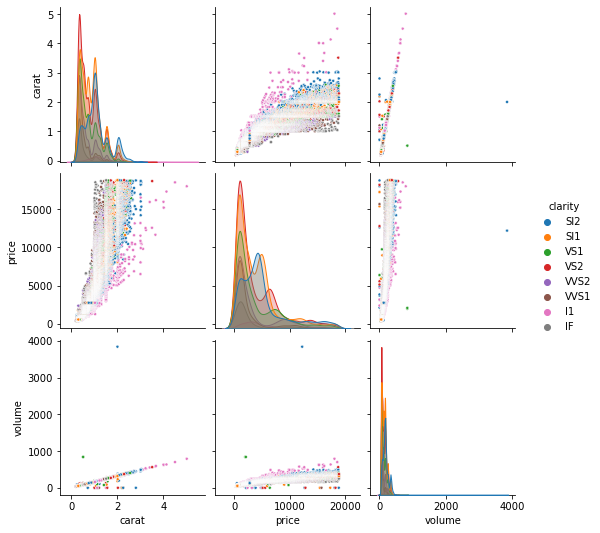

In [71]:
attributes=['carat','price','volume']
sns.pairplot(data=diamonds,hue='clarity',vars=attributes[0:3],markers='.')

# data cleaning 

In [4]:
diamonds.drop(['x','y','z'],axis=1,inplace=True)

In [5]:
diamonds.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


In [6]:
diamonds.drop(diamonds[diamonds['volume']==0].index,inplace=True)

drooping the missing data

In [12]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  object 
 2   color    53920 non-null  object 
 3   clarity  53920 non-null  object 
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   price    53920 non-null  int64  
 7   volume   53920 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 3.7+ MB


the data was 53940 and become 53920 that means it worked

In [7]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(diamonds, test_size=0.2, random_state=42)

In [8]:
diamonds=train_set.drop('price',axis=1)
diamonds_label=train_set['price'].copy()

In [9]:
diamonds_cat=diamonds[['cut','clarity','color']]

In [10]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
diamonds_cat_encoded = ordinal_encoder.fit_transform(diamonds_cat)

In [11]:
diamonds_cat[0:10]

,cut,clarity,color
50176,Ideal,VS1,E
17688,Premium,SI2,D
38203,Premium,VS2,H
1826,Very Good,VS1,F
34543,Very Good,VS2,E
43245,Ideal,VVS1,E
4653,Premium,SI2,I
3912,Premium,VS2,E
18974,Premium,VS2,J
43763,Ideal,IF,F


In [12]:
diamonds_cat_encoded[0:10]

array([[2., 4., 1.],
       [3., 3., 0.],
       [3., 5., 4.],
       [4., 4., 2.],
       [4., 5., 1.],
       [2., 6., 1.],
       [3., 3., 5.],
       [3., 5., 1.],
       [3., 5., 6.],
       [2., 1., 2.]])

In [13]:
ordinal_encoder.categories_

[array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object),
 array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
       dtype=object),
 array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object)]

we use an ordinal encoder but the categories are in the righit order so we will encode usning manual techniques

In [11]:
cleanup_nums = {"cut":     {"Ideal": 0, "Premium": 1,"Very Good":2,"Good":3,"Fair":4},
                "clarity": {"IF": 0, "VVS1": 1, "VVS2": 2, "VS1": 3,
                                  "VS2": 4, "SI1": 5, "SI2":6,"I1":7 },
              "color":{"D":0,"E":1,"F":2,"G":3,"H":4,"I":5,"J":6}}

In [12]:
diamonds[['cut','clarity','color']]=diamonds[['cut','clarity','color']].replace(cleanup_nums)

In [13]:
diamonds[['cut','clarity','color']][0:10]

,cut,clarity,color
50176,0,3,1
17688,1,6,0
38203,1,4,4
1826,2,3,2
34543,2,4,1
43245,0,1,1
4653,1,6,5
3912,1,4,1
18974,1,4,6
43763,0,0,2


In [38]:
diamonds_cat[0:10]

,cut,clarity,color
50176,Ideal,VS1,E
17688,Premium,SI2,D
38203,Premium,VS2,H
1826,Very Good,VS1,F
34543,Very Good,VS2,E
43245,Ideal,VVS1,E
4653,Premium,SI2,I
3912,Premium,VS2,E
18974,Premium,VS2,J
43763,Ideal,IF,F


In [14]:
from sklearn.preprocessing import StandardScaler
diamonds_num = diamonds.drop(['cut','clarity','color',], axis=1)
diamonds_num=StandardScaler().fit_transform(diamonds_num)

In [86]:
diamonds_num

array([[-0.52156219, -0.17285624, -0.65496159, -0.50509946],
       [ 1.06017528, -1.08297549,  0.69211743,  1.00468321],
       [-0.77464018,  0.10718045, -1.10398793, -0.73932817],
       ...,
       [-0.83790968,  0.17718962, -0.65496159, -0.81013095],
       [ 0.21658197,  0.737263  ,  0.69211743,  0.14476187],
       [ 0.87036679,  0.80727217,  0.24309109,  0.84967823]])

In [15]:
diamonds[['carat','depth','table','volume']]=StandardScaler().fit_transform(diamonds[['carat','depth','table','volume']])

In [24]:
diamonds.head()

,carat,cut,color,clarity,depth,table,volume
50176,-0.521562,0,1,3,-0.172856,-0.654962,-0.505099
17688,1.060175,1,0,6,-1.082975,0.692117,1.004683
38203,-0.774640,1,4,4,0.107180,-1.103988,-0.739328
1826,-0.163035,2,2,3,0.247199,0.692117,-0.176771
34543,-0.774640,2,1,4,0.317208,0.243091,-0.755201


data is ready

In [16]:
from sklearn.linear_model import LinearRegression
li_reg=LinearRegression()
li_reg.fit(diamonds,diamonds_label)

LinearRegression()

In [17]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(li_reg.predict(diamonds),diamonds_label))

1242.69218489573

well that's not promising

In [19]:
from sklearn.tree import DecisionTreeRegressor 

In [20]:
dec_tr=DecisionTreeRegressor()
dec_tr.fit(diamonds,diamonds_label)

DecisionTreeRegressor()

In [21]:
np.sqrt(mean_squared_error(dec_tr.predict(diamonds),diamonds_label))

33.4313580541933

is not necessarily true maybe the module just overfit the data 
let us do cross-validate to be sure

In [22]:
from sklearn.model_selection import cross_val_score

In [63]:
scores=cross_val_score(dec_tr,diamonds,diamonds_label,scoring="neg_mean_squared_error",cv=10)
scoor=np.sqrt(-scores)

In [64]:
print(scoor)
print('means:',scoor.mean())
print('Standard deviation',scoor.std())

[695.2297383  725.65509299 724.93970701 702.70898342 756.58319174
 715.67417456 770.05051495 727.65225885 753.17816927 744.0604863 ]
means: 731.5732317383656
Standard deviation 22.86893238675848


it is better than the liner reg 

In [24]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(diamonds,diamonds_label)

RandomForestRegressor()

In [25]:
np.sqrt(mean_squared_error(forest_reg.predict(diamonds),diamonds_label))

206.26258725604245

In [26]:
ra_scores=cross_val_score(forest_reg,diamonds,diamonds_label,scoring="neg_mean_squared_error",cv=10)
scoor=np.sqrt(-ra_scores)
print(scoor)
print('means:',scoor.mean())
print('Standard deviation',scoor.std())

[532.6648597  550.36417941 536.42691305 542.79183769 561.34035262
 571.63503102 558.48907153 523.79152983 566.38677793 558.41182434]
means: 550.2302377104281
Standard deviation 14.937227331462175


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators': [50,60,70], 'max_features': [2,3,4,6]},{'bootstrap': [False], 'n_estimators': [50,60], 'max_features': [2,3,4]},]
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(diamonds,diamonds_label)

In [77]:
evsc=grid_search.cv_results_
for mean_sc,parm in zip(evsc["mean_test_score"],evsc["params"]):
    print(np.sqrt(-mean_sc),parm)

569.3734834120502 {'max_features': 2, 'n_estimators': 50}
567.3072561747733 {'max_features': 2, 'n_estimators': 60}
563.8902571674788 {'max_features': 2, 'n_estimators': 70}
551.5961908391597 {'max_features': 3, 'n_estimators': 50}
549.601375335754 {'max_features': 3, 'n_estimators': 60}
549.6622178126609 {'max_features': 3, 'n_estimators': 70}
548.9530137756099 {'max_features': 4, 'n_estimators': 50}
549.5847159782717 {'max_features': 4, 'n_estimators': 60}
548.7188601709414 {'max_features': 4, 'n_estimators': 70}
556.6257340990139 {'max_features': 6, 'n_estimators': 50}
556.5793660009479 {'max_features': 6, 'n_estimators': 60}
554.5687742029328 {'max_features': 6, 'n_estimators': 70}
565.8006467615329 {'bootstrap': False, 'max_features': 2, 'n_estimators': 50}
565.180260436461 {'bootstrap': False, 'max_features': 2, 'n_estimators': 60}
559.9820790069823 {'bootstrap': False, 'max_features': 3, 'n_estimators': 50}
558.3183046813588 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [88]:
final_model=grid_search.best_estimator_

In [89]:
X= test_set.drop("price", axis=1)
Y= test_set["price"].copy()

In [90]:
X[['carat','depth','table','volume']]=StandardScaler().fit_transform(X[['carat','depth','table','volume']])
X[['cut','clarity','color']]=X[['cut','clarity','color']].replace(cleanup_nums)

In [92]:
finalpred=final_model.predict(X)
np.sqrt(mean_squared_error(Y,finalpred))

539.0516260713903